# Prisoner's Dilemma

We can define the prisoner's dilemma as a game with the following payoff matrix:

|  | D | C |
|---|---|---|
| D | 0,0 | -1,4 |
| C | -1,4 | 2,2 |


In the above matrix we can identify the possible actions of the players as "Defect/Rat out" and "Cooperate / Stay silent". The first element of the tuple is the payoff for player 1, the second element is the payoff for player 2. And the values in the matrix are the payoffs $u_i$ for the respective actions. Let us write it out:

- If player 1 cooperates and player 2 defects, then the payoff for player 1 is -1 and the payoff for player 2 is 4. 
- If player 1 defects and player 2 cooperates, then the payoff for player 1 is 4 and the payoff for player 2 is -1. 
- If both players cooperate, then the payoff for both players is 2. 
- If both players defect, then the payoff for both players is 0.

Suppose we are player 1. We do not know the choice of player 2, so there we know that he will choose "Defect" with probability $p$ and "Cooperate" with probability $1-p$. Suppose that we choose "Cooperate". Then the expected utility is
$$
E_{C,1} = p \cdot -1 + (1-p) \cdot 2 = 2- 3p
$$

Now what happens if we choose "Defect"? Then the expected utility is
$$
E_{D,1} = p \cdot 4 + (1-p) \cdot 0 = 4p
$$

Let us plot it up for all possible values of $p$.

In [95]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Literal
import random

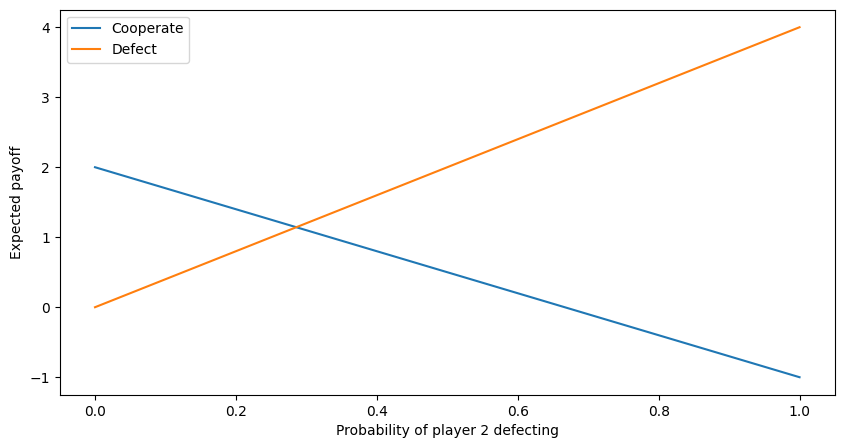

In [96]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
p = np.linspace(0, 1, 100)
ax.plot(p, 2-3*p, label="Cooperate")
ax.plot(p, 4*p, label="Defect")
ax.set_xlabel("Probability of player 2 defecting")
ax.set_ylabel("Expected payoff")
ax.legend()

## Random strategy

Let us now implement the prisoner's dilemma in Python. For this we can simply translate in the following way:

In [97]:
Choice = Literal["D", "C"]
Strategy = Literal["random", "defect", "cooperate"]

def prisoner_dilemma(choice_1:Choice, choice_2:Choice)->tuple[int]:
    """
    The prisoner's dilemma game. Each player can choose to cooperate or defect.

    Args:
        choice_1: Choice, whether player 1 cooperates
        choice_2: Choice, whether player 2 cooperates
    
    Returns:
        tuple[int], the payoff for each player
    """
    if choice_1 == "C" and choice_2 == "C":
        return 2, 2
    elif choice_1 == "C" and choice_2 == "D":
        return -1, 4
    elif choice_1 == "D" and choice_2 == "C":
        return 4, -1
    else:
        return 0, 0


def repeated_pd(Ngames: int, strategy:list[Strategy] = ["random", "random"]) -> tuple[list[int], list[int]]:
    """
    Play the prisoner's dilemma game repeatedly in a random way.

    Args:
        Ngames: the number of games to play
    
    Returns:
        the accumulated payoffs for each player
    """
    choices = ["D", "C"]
    if strategy[0] == "random":
        player1 = [random.choice(choices) for _ in range(Ngames)]
    elif strategy[0] == "defect":
        player1 = ["D"] * Ngames
    elif strategy[0] == "cooperate":
        player1 = ["C"] * Ngames
    if strategy[1] == "random":
        player2 = [random.choice(choices) for _ in range(Ngames)]
    elif strategy[1] == "defect":
        player2 = ["D"] * Ngames
    elif strategy[1] == "cooperate":
        player2 = ["C"] * Ngames
    
    liste = list(zip(player1, player2))

    tot_payout_1 = np.zeros(Ngames)
    tot_payout_2 = np.zeros(Ngames)

    for i, game in enumerate(liste):
        payout1, payout2 = prisoner_dilemma(*game)
        if i == 0:
            tot_payout_1[i] = payout1
            tot_payout_2[i] = payout2
        else:
            tot_payout_1[i] = tot_payout_1[i - 1] + payout1
            tot_payout_2[i] = tot_payout_2[i - 1] + payout2

    return tot_payout_1, tot_payout_2

In [98]:
print(prisoner_dilemma("C", "C"))

(2, 2)


Now that we have played it once, we can run it multiple times to simulate the repeated game.

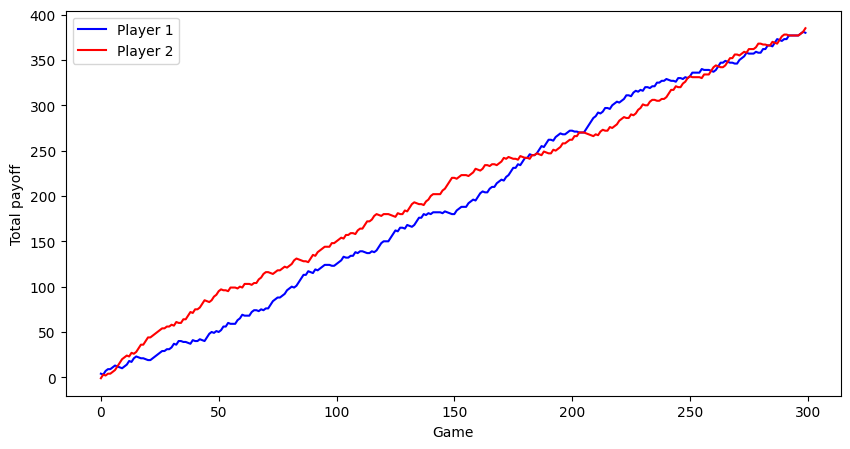

In [99]:
Ngames = 300
player_1_color = "blue"
player_2_color = "red"
tot_payout_1, tot_payout_2 = repeated_pd(Ngames)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(tot_payout_1, label="Player 1", color=player_1_color)
ax.plot(tot_payout_2, label="Player 2", color=player_2_color)
ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()

In [100]:
u1s = np.insert(np.diff(tot_payout_1), 0, tot_payout_1[0])
u1s

array([ 4., -1.,  4.,  2.,  0.,  2.,  2., -1., -1., -1.,  2.,  2.,  4.,
       -1.,  4.,  2., -1., -1.,  0., -1., -1.,  0.,  2.,  2.,  2.,  2.,
        2.,  0.,  2.,  0.,  2.,  4., -1.,  4.,  0., -1.,  0., -1., -1.,
        4., -1.,  0.,  2., -1., -1.,  4.,  4.,  2., -1.,  2., -1.,  2.,
        4.,  0.,  4., -1.,  0.,  0.,  4.,  2.,  4., -1.,  0.,  0.,  4.,
        2.,  0., -1.,  2., -1.,  2.,  0.,  4.,  4.,  2.,  2.,  0.,  2.,
        2.,  4.,  2.,  2., -1.,  2.,  4.,  4.,  4.,  0.,  4., -1., -1.,
        4., -1.,  2.,  2.,  2.,  0.,  0., -1.,  0.,  2.,  2.,  2.,  4.,
       -1.,  0.,  2.,  0.,  4., -1.,  2.,  0., -1., -1.,  0.,  2., -1.,
        2.,  4.,  4.,  2.,  0.,  0.,  4.,  4.,  4., -1.,  4.,  0., -1.,
        4., -1., -1.,  2.,  4.,  4.,  0.,  4., -1.,  2., -1.,  2.,  0.,
        0.,  0., -1.,  2., -1., -1., -1.,  0.,  4.,  2.,  2.,  0.,  0.,
        4.,  2.,  2., -1.,  4.,  4.,  2., -1.,  0.,  4.,  2.,  0.,  4.,
        2.,  2., -1.,  4.,  2.,  4.,  4.,  0.,  4., -1.,  4.,  4

While this is all fun let us simulate a lot of those games.

Text(0.5, 1.0, 'Average payoffs over 100 simulations with random strategies')

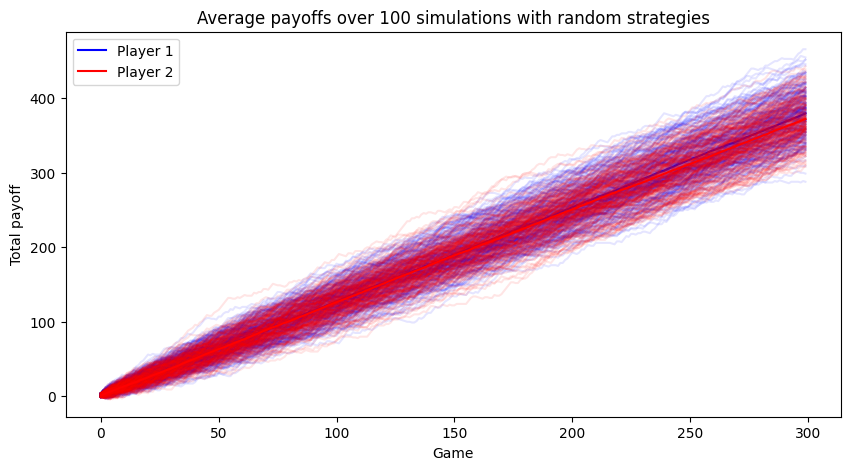

In [101]:
Nsim = 200

sim_payouts_1 = np.zeros((Ngames, Nsim))
sim_payouts_2 = np.zeros((Ngames, Nsim))

for i in range(Nsim):
    tot_payout_1, tot_payout_2 = repeated_pd(Ngames)
    sim_payouts_1[:, i] = tot_payout_1
    sim_payouts_2[:, i] = tot_payout_2

av_payout_1 = np.mean(sim_payouts_1, axis=1)
av_payout_2 = np.mean(sim_payouts_2, axis=1)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sim_payouts_1, color=player_1_color, alpha=0.1)
ax.plot(av_payout_1, color=player_1_color, label="Player 1")
ax.plot(sim_payouts_2, color=player_2_color, alpha=0.1)
ax.plot(av_payout_2, color=player_2_color, label="Player 2")

ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()
ax.set_title("Average payoffs over 100 simulations with random strategies")

What is the expectation value ?

In [102]:
av_payoff_per_game = av_payout_1[-1]/Ngames
print(f"The average payoff per game is {av_payoff_per_game:.2f}")

The average payoff per game is 1.27


Can we use those observations to calculate the discounted payoff ? Actually we can simply take the average of the payoffs and multiply it with the discount factor.

In [103]:
# calculate the winnings in each round for each player from the simulated payouts

u1s = np.diff(sim_payouts_1, axis=0)
u2s = np.diff(sim_payouts_2, axis=0)

# reinsert the first round winnings
u1s = np.insert(u1s, 0, sim_payouts_1[0], axis=0)
u2s = np.insert(u2s, 0, sim_payouts_2[0], axis=0)

# calculate the average winnings in each round
av_u1 = np.mean(u1s, axis=1)
av_u2 = np.mean(u2s, axis=1)

# apply the discount factor
beta = 0.2

U1 = 0
for i, u1 in enumerate(av_u1):
    U1 += u1 * beta**i

print(f"The discounted payoff for player 1 is {U1:.2f}")


The discounted payoff for player 1 is 1.69


This should be equal to the average payoff of the game with the discount factor.

In [104]:
av_payoff_per_game/(1-beta)

np.float64(1.5822083333333332)

## Ratting them out

We have seen above that it is better to defect than to cooperate. But what happens if we play the game multiple times? Let us simulate this. First against the random strategy:



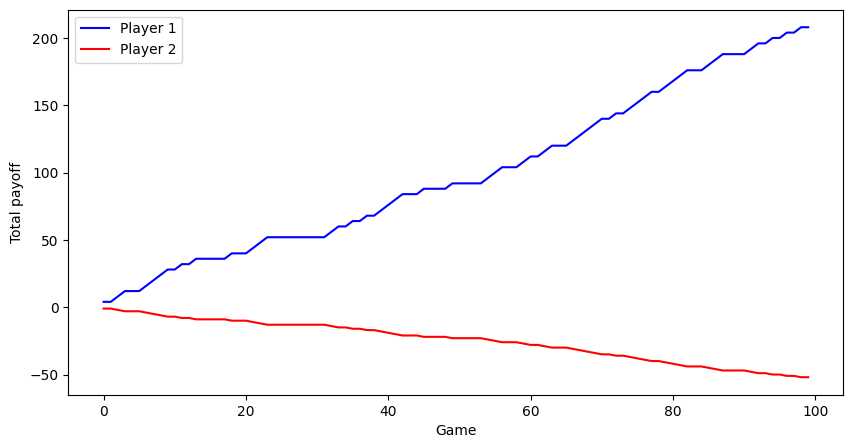

In [105]:
Ngames = 100
player_1_color = "blue"
player_2_color = "red"
tot_payout_1, tot_payout_2 = repeated_pd(Ngames, ["defect", "random"])
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(tot_payout_1, label="Player 1", color=player_1_color)
ax.plot(tot_payout_2, label="Player 2", color=player_2_color)
ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()

We can see quite clearly that the upside of ratting out the other all the time is quite high. Let us simulate this a lot of times.

Text(0.5, 1.0, 'Average payoffs over 100 simulations with one defective player')

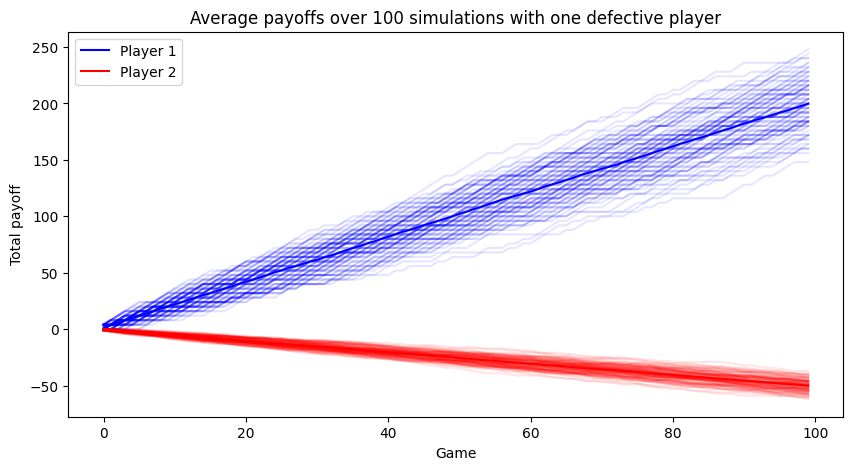

In [106]:
Nsim = 100

sim_payouts_1 = np.zeros((Ngames, Nsim))
sim_payouts_2 = np.zeros((Ngames, Nsim))

for i in range(Nsim):
    tot_payout_1, tot_payout_2 = repeated_pd(Ngames, ["defect", "random"])
    sim_payouts_1[:, i] = tot_payout_1
    sim_payouts_2[:, i] = tot_payout_2

av_payout_1 = np.mean(sim_payouts_1, axis=1)
av_payout_2 = np.mean(sim_payouts_2, axis=1)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sim_payouts_1, color=player_1_color, alpha=0.1)
ax.plot(av_payout_1, color=player_1_color, label="Player 1")
ax.plot(sim_payouts_2, color=player_2_color, alpha=0.1)
ax.plot(av_payout_2, color=player_2_color, label="Player 2")

ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()
ax.set_title("Average payoffs over 100 simulations with one defective player")

In [107]:
av_payoff_per_game = av_payout_1[-1] / Ngames
print(f"The average payoff per game is {av_payoff_per_game:.2f}")

The average payoff per game is 2.00


But clearly the other guy does get it. So what happens if both keep ratting each other out ?

Text(0.5, 1.0, 'Average payoffs over 100 simulations with one defective player')

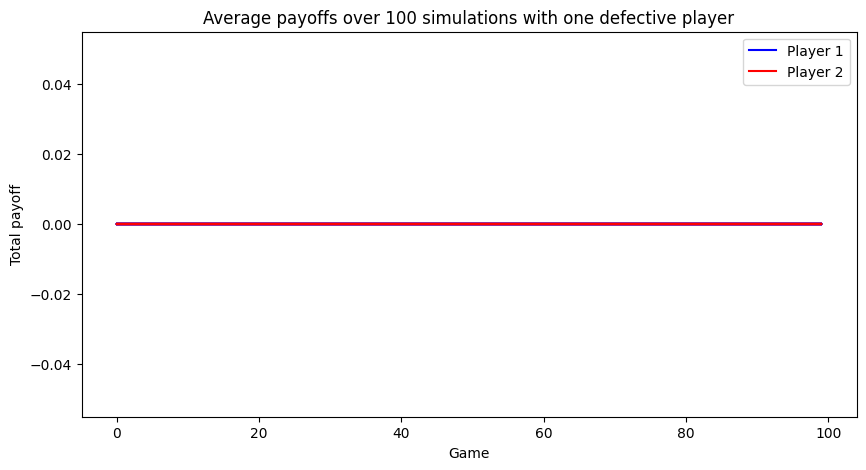

In [108]:
Nsim = 100

sim_payouts_1 = np.zeros((Ngames, Nsim))
sim_payouts_2 = np.zeros((Ngames, Nsim))

for i in range(Nsim):
    tot_payout_1, tot_payout_2 = repeated_pd(Ngames, ["defect", "defect"])
    sim_payouts_1[:, i] = tot_payout_1
    sim_payouts_2[:, i] = tot_payout_2

av_payout_1 = np.mean(sim_payouts_1, axis=1)
av_payout_2 = np.mean(sim_payouts_2, axis=1)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sim_payouts_1, color=player_1_color, alpha=0.1)
ax.plot(av_payout_1, color=player_1_color, label="Player 1")
ax.plot(sim_payouts_2, color=player_2_color, alpha=0.1)
ax.plot(av_payout_2, color=player_2_color, label="Player 2")

ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()
ax.set_title("Average payoffs over 100 simulations with one defective player")

Well, they are not in a great position. They have no way to earn any money.

## Being nice

What happens if we are nice all the time? Let us simulate

Text(0.5, 1.0, 'Average payoffs over 100 simulations with both players cooperating')

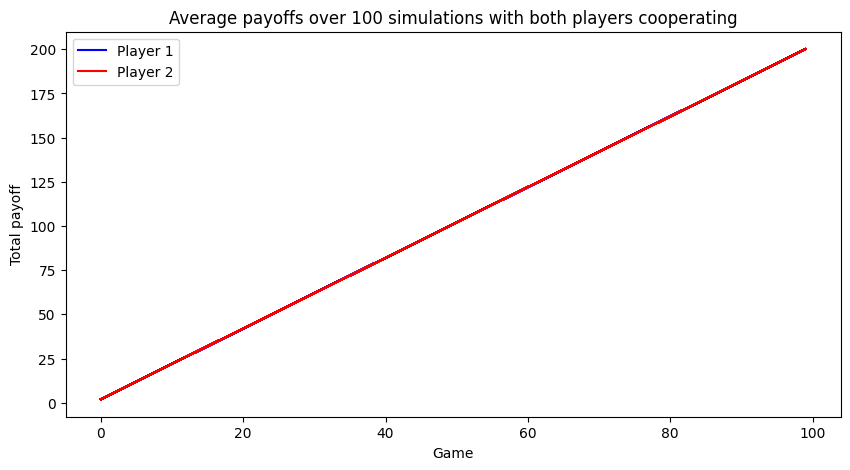

In [109]:
Nsim = 100

sim_payouts_1 = np.zeros((Ngames, Nsim))
sim_payouts_2 = np.zeros((Ngames, Nsim))

for i in range(Nsim):
    tot_payout_1, tot_payout_2 = repeated_pd(Ngames, ["cooperate", "cooperate"])
    sim_payouts_1[:, i] = tot_payout_1
    sim_payouts_2[:, i] = tot_payout_2

av_payout_1 = np.mean(sim_payouts_1, axis=1)
av_payout_2 = np.mean(sim_payouts_2, axis=1)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sim_payouts_1, color=player_1_color, alpha=0.1)
ax.plot(av_payout_1, color=player_1_color, label="Player 1")
ax.plot(sim_payouts_2, color=player_2_color, alpha=0.1)
ax.plot(av_payout_2, color=player_2_color, label="Player 2")

ax.set_xlabel("Game")
ax.set_ylabel("Total payoff")
ax.legend()
ax.set_title("Average payoffs over 100 simulations with both players cooperating")

## Cooperating strategies

There have been plenty of strategies developped to enforce people to cooperate. The strategy basically has to make sure that you are nice but not so nice that the other player starts exploiting you. An example is the so-called "grim trigger". Suppose that the other player never defected. In this case you also keep collaborating. But what happens if the other person suddenly defects to exploit how nice you are ? Then you use the most severe punishment and keep defecting all the time. This really makes the defection for the other player uninteresting. It would seem that the most effective strategy there is actually the tip-for-tat strategy. This strategy simply does what the other player did in the last round, starting by being nice.

### Some famous strategies

- Tit-for-tat: The player starts with C and then always mirrors the action of the other bot. Is nice, reactive and not complicated.
- Grim trigger: Cooperate until someone plays D. Then you punish him forever.
- Win-stay-loos-change